# Supply Chain Analysis

## 1. Data Information

In [461]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [462]:
# Loading the dataset
df = pd.read_csv('C:\\Payal\\Python\\Project\\supply_chain_data.csv')

In [463]:
df.shape

(100, 24)

In [464]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [465]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [466]:
# Check for null values
pd.isnull(df).sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [467]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [468]:
df.describe

<bound method NDFrame.describe of    Product type    SKU      Price  Availability  Number of products sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    Revenue generated Customer demographics  Stock le

In [469]:
df.duplicated().sum()

0

## 2. Expolratory Data Analysis

### a. Product Details

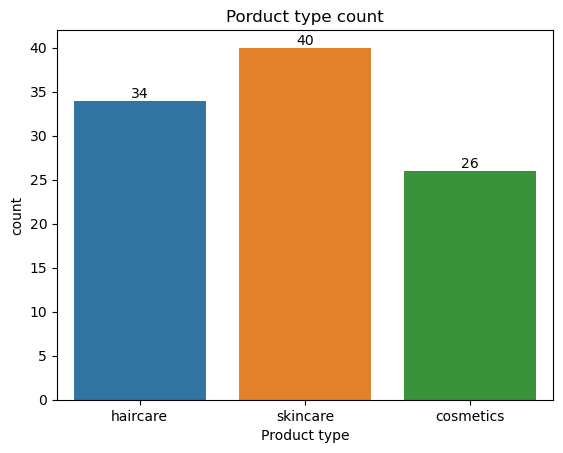

In [472]:
# Number of Product types
ax= sns.countplot(x= "Product type", data = df)
plt.title("Porduct type count")

for bars in ax.containers:
    ax.bar_label(bars)


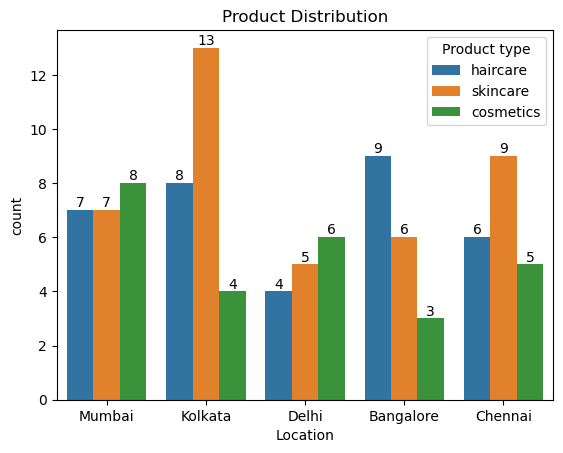

In [473]:
# Distribution of Producttion
ax=sns.countplot(x= "Location", data = df, hue = "Product type")
plt.title("Product Distribution")
for bars in ax.containers:
    ax.bar_label(bars)

##### Insight : From the above graphs we can see that most of the product type is Skincare and it is highly sold in Kolkata followed by Chennai and Mumbai.

([<matplotlib.patches.Wedge at 0x1a44f7b7b90>,
 [Text(0.304529680272457, 1.1607160177378253, 'skincare'),
  Text(-0.9972316740459377, -0.4642509970689744, 'haircare'),
  Text(0.7659547376395375, -0.9237496088700377, 'cosmetics')],
 [Text(0.17764231349226656, 0.6770843436803979, '41.8%'),
  Text(-0.5439445494796024, -0.2532278165830769, '30.2%'),
  Text(0.4468069302897301, -0.538853938507522, '28.0%')])

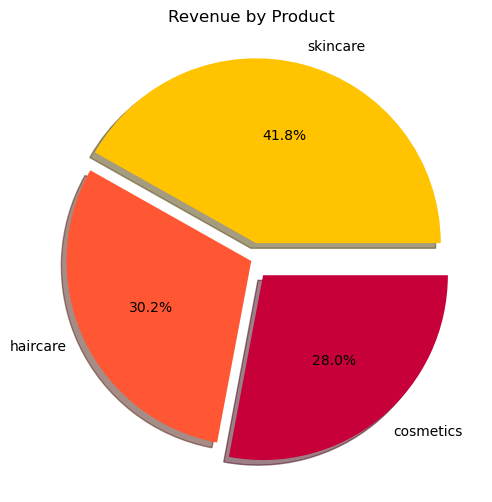

In [475]:
# Product wise Revenue

Product_Revenue = df.groupby(["Product type"], as_index = False)["Revenue generated"].sum().sort_values(by = "Revenue generated", ascending = False)

plt.figure(figsize=(6,6))
plt.title("Revenue by Product", y = True)
e = [0.1,0,0.1]
a= ["#FFC300","#FF5733","#C70039"]
plt.pie(Product_Revenue["Revenue generated"], labels= Product_Revenue["Product type"], colors= a, explode = e, autopct = "%1.1f%%", shadow = True)


([<matplotlib.patches.Wedge at 0x1a44f91e990>,
 [Text(0.8786401798764742, 0.8173074294943348, 'Mumbai'),
  Text(-0.6858983712314728, 0.8599671065465312, 'Kolkata'),
  Text(-1.055361079772959, -0.571150585485522, 'Chennai'),
  Text(0.15713882061244375, -1.1896669244189866, 'Bangalore'),
  Text(1.085338993008968, -0.5118977146406101, 'Delhi')],
 [Text(0.5125401049279432, 0.4767626672050286, '23.8%'),
  Text(-0.37412638430807604, 0.46907296720719877, '23.7%'),
  Text(-0.615627296534226, -0.3331711748665545, '20.6%'),
  Text(0.0916643120239255, -0.693972372577742, '17.8%'),
  Text(0.6331144125885646, -0.29860700020702247, '14.0%')])

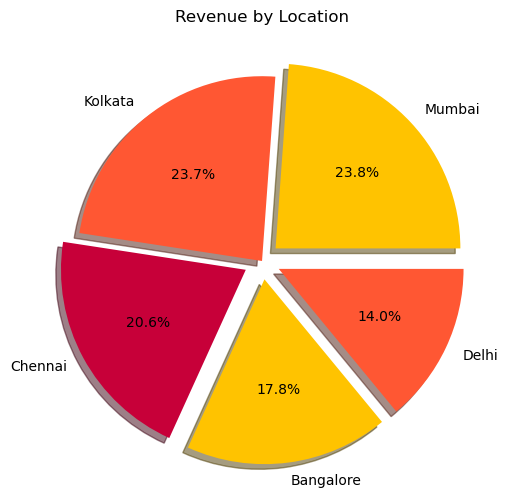

In [476]:
 # Location wise Revenue

Location_Revenue = df.groupby(["Location"], as_index = False)["Revenue generated"].sum().sort_values(by = "Revenue generated", ascending = False)

plt.figure(figsize=(6,6))
plt.title("Revenue by Location", y = True)
e = [0.1,0,0.1,0.1,0.1]
a= ["#FFC300","#FF5733","#C70039"]
plt.pie(Location_Revenue["Revenue generated"], labels= Location_Revenue["Location"], colors= a, explode = e, autopct = "%1.1f%%", shadow = True)

##### Insight : From the above graphs we can see that highest revenue is generated by Skincare products and the highest revenue generating regions are Mumbai and Kolkata

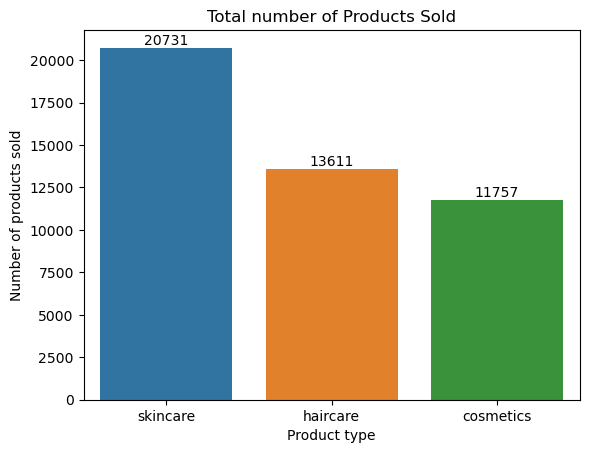

In [478]:
# Total number of products sold
Quantity_sold = df.groupby(["Product type"], as_index = False)["Number of products sold"].sum().sort_values(by = "Number of products sold", ascending = False)

a= sns.barplot(x= "Product type", y = "Number of products sold", data = Quantity_sold)
plt.title("Total number of Products Sold", y = True)

for bars in a.containers:
    a.bar_label(bars)

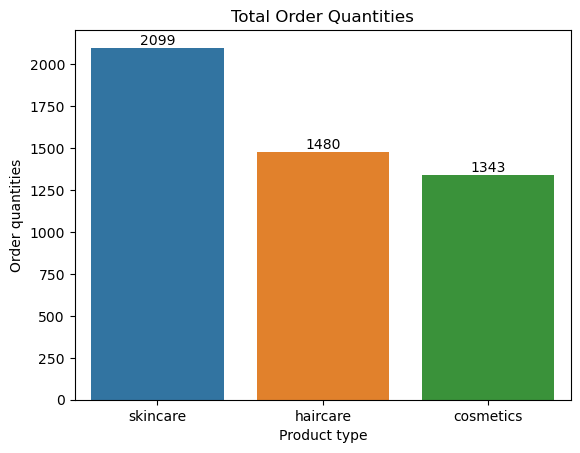

In [479]:
# Total order Quantities
Order_quantities = df.groupby(["Product type"], as_index = False)["Order quantities"].sum().sort_values(by = "Order quantities", ascending = False)

a= sns.barplot(x= "Product type", y = "Order quantities", data = Order_quantities)
plt.title("Total Order Quantities", y = True)

for bars in a.containers:
    a.bar_label(bars)

##### Insight : From the above graphs we can see that Skincare is the most sold product types and also it is the one which is receiving most order quantities.

C:\Users\payal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Count of Defect rates'}, xlabel='Defect rates', ylabel='Count'>

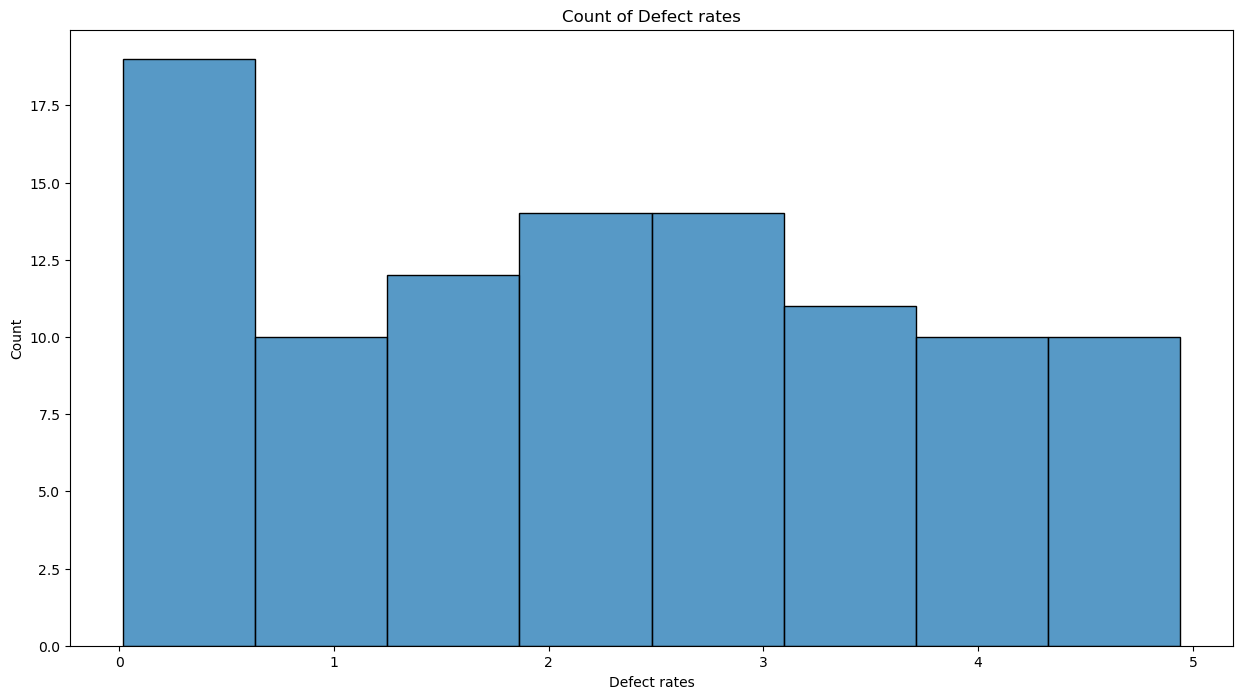

In [481]:
# Defect rates count
plt.figure(figsize = (15,8))
plt.title("Count of Defect rates")
sns.histplot(data = df, x = "Defect rates")


In [565]:
# below stock levels but fail in inspection
need_order_f = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Fail')]
print('Need to order but fail in inspection:',need_order_f.shape[0])

# below stock levels but pending in inspection
need_order_Pending = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Pending')]
print('Need to order but pending in inspection:',need_order_Pending.shape[0])

# below stock levels and pass in inspection
need_order_Pass = df.loc[(df['Availability']<df['Stock levels'])&(df['Inspection results']=='Pass')]
print('Need to order and pass in inspection:',need_order_Pass.shape[0])


Need to order but fail in inspection: 15
Need to order but pending in inspection: 23
Need to order and pass in inspection: 13


##### Insight: From the above graphs we can see that the prodcut defects lies bewteen 0-0.8 .There are 51 items are below their stock levels, and need to order.
15 of them still have fail in inspection result.
23 of them are pending in inspection results

### b. Manufcturing Details

Text(0.5, True, 'Production volumes')

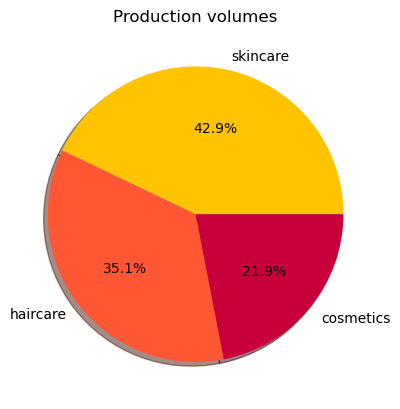

In [485]:
# Production Volumes
Production_volumes= df.groupby(["Product type"], as_index = False)["Production volumes"].sum().sort_values(by = "Production volumes", ascending = False)

a= ["#FFC300","#FF5733","#C70039"]
plt.pie(Production_volumes["Production volumes"], labels= Production_volumes["Product type"], colors= a , autopct = "%1.1f%%",shadow = True)
plt.title("Production volumes", y = True)



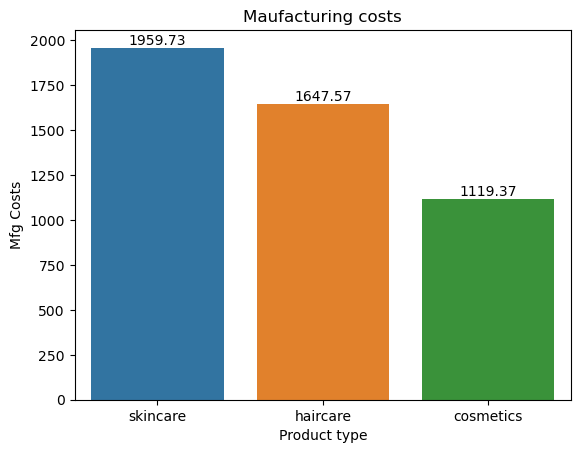

In [486]:
# Manufacturing cost

Mfg_cost= df.groupby(["Product type"], as_index = False)["Manufacturing costs"].sum().sort_values(by = "Manufacturing costs", ascending = False)

a= sns.barplot(x= "Product type", y = "Manufacturing costs", data = Mfg_cost)
plt.xlabel("Product type")
plt.ylabel("Mfg Costs")
plt.title("Maufacturing costs", y = True)

for bars in a.containers:
    a.bar_label(bars)


C:\Users\payal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Mfg lead time')

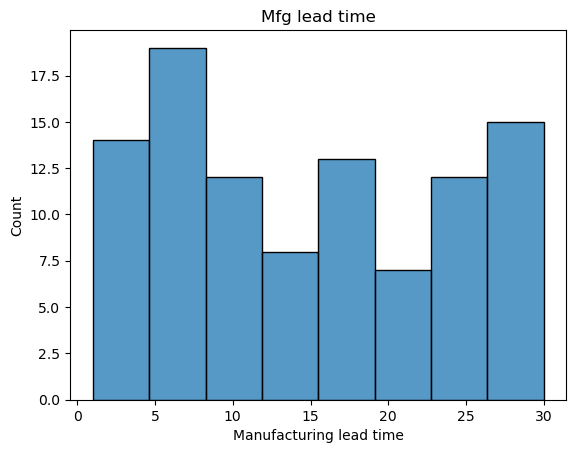

In [487]:
# Manufacturing Lead Times
ax3=sns.histplot(data = df, x = "Manufacturing lead time")
plt.title("Mfg lead time")

##### Insights: From the above graphs we can see that most of the production volumes and costs are for Skincare product types and also most of the Manufacturing lead time is between 5 to 10 days

### c. Supplier information

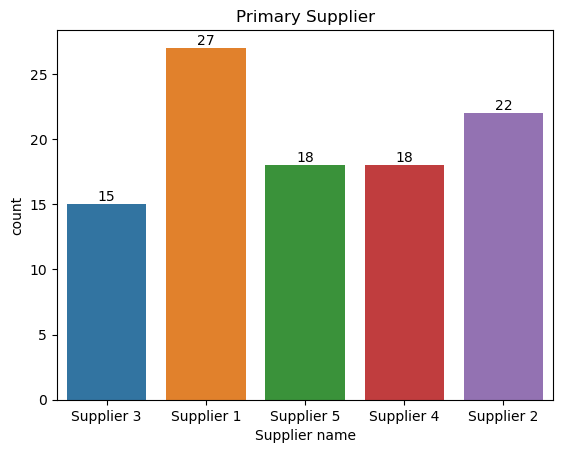

In [490]:
# Primary SUpplier
a = sns.countplot(x= "Supplier name", data = df)
plt.title("Primary Supplier")

for bars in a.containers:
    a.bar_label(bars)

##### Insight: From the above plot we can see that the Primary supplier is Supplier1 followed by supplier2

### d.Shipping Information

Text(0.5, True, 'Costliest carrier')

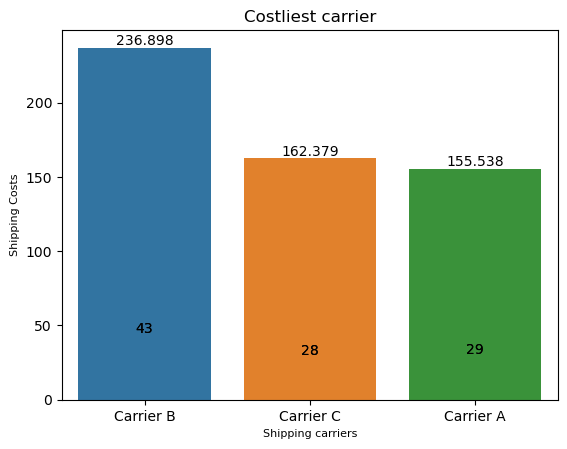

In [553]:
ax1 = sns.countplot(x= "Shipping carriers", data = df)
for bars in ax1.containers:
    ax1.bar_label(bars)
plt.xlabel('Shipping carriers', fontsize=8)  
plt.ylabel('Count', fontsize=8) 
ax1.set_title("Shipping Carriers", fontsize=10)


Costliest_carrier = df.groupby(["Shipping carriers"], as_index = False)["Shipping costs"].sum().sort_values(by = "Shipping costs", ascending = False)

ax2 = sns.barplot(x= "Shipping carriers", y = "Shipping costs", data = Costliest_carrier)
for bars in ax2.containers:
    ax2.bar_label(bars)
plt.xlabel("Shipping carriers")
plt.ylabel("Shipping Costs")
ax2.set_title("Costliest carrier", y = True)

##### Insight : From the above graph we can see that there are total 43 Carrier B and it is the costliest of all

### e.Transportation Information

Text(0.5, 1.0, 'Transportation Modes')

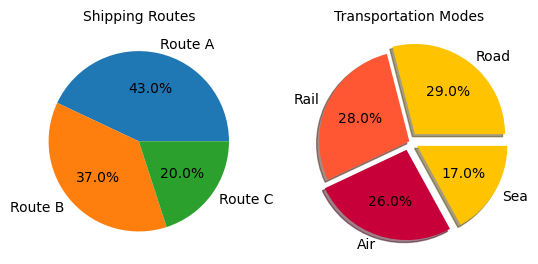

In [495]:
fig = plt.figure()
ax1= fig.add_subplot(1,2,1)  
ax2= fig.add_subplot(1,2,2)


route_counts = df['Routes'].value_counts()

ax1.pie(route_counts, labels=route_counts.index, autopct='%1.1f%%')
ax1.set_title("Shipping Routes", fontsize = 10)

Modes_counts = df['Transportation modes'].value_counts()

e = [0.1,0,0.1,0.1]
a= ["#FFC300","#FF5733","#C70039"]
ax2.pie(Modes_counts , labels=Modes_counts.index, autopct='%1.1f%%', colors= a, explode = e, shadow = True)
ax2.set_title("Transportation Modes", fontsize = 10)


##### insight: From the above graphs we see that RoteA is the most used route for transporation and the most common used mode is by Road.

### Conclusion

- Most of the Porduct volumes and cost is for Skincare product types which is Highly sold product type in Mumbai and Kolkata
- Most of the revenue is generated by Skincare products from Mumbai and Kolkata regions.
- Also Skincare is the most sold product type and also it is the one receiving most order quantities
- The Primary Supplier is Supplier1
- Carrier B is mostly used for shipping and it is the cosliest of all 
- Route A is the most preferred route for Transportation and most of the transporatation is done road.
- There are 51 items are below their stock levels, and need to order.15 of them still have fail in inspection results and 23 of them are pending in  inspection results